### Iris task result by Yoni Danzig

visualize the iris data:

In [16]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()  #type is sklearn.utils.Bunch --> let's convery to Pandas dataframe type:  
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['species_id'] = data['target']                                                #Adding the species_id to the df table
df['species'] = df['species_id'].replace([0,1,2], data['target_names'].tolist()) #Adding the species name table using the id one.
df.drop(['species_id'], axis=1, inplace=True)                                    #Deleting the species_id table since we don't need it anymore 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can use Seaborn to conveniently visualize the data:

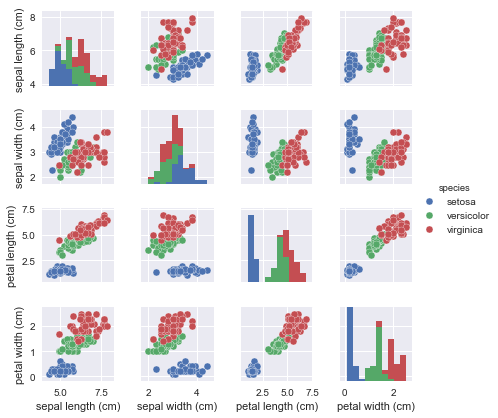

In [17]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='species', size=1.5);

We will extract the features matrix and target array from the DataFrame

In [19]:
X_iris = df.drop('species', axis=1)
X_iris.shape

(150, 4)

In [20]:
y_iris = df['species']
y_iris.shape

(150,)

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows.

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.


### Gaussian naive Bayes model for supervised learning example:
We will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [24]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality using PCA technique.

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis, which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [26]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

In [33]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,setosa,-2.728593,0.333925


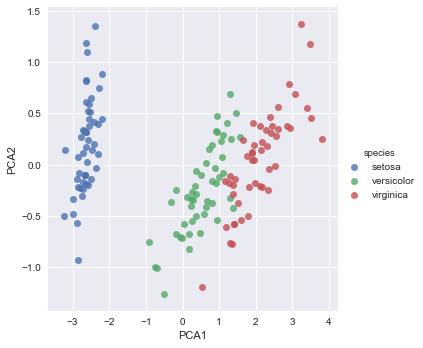

In [34]:
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

### Unsupervised learning: Iris clustering using GMM clustering method

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a powerful clustering method called a Gaussian mixture model (GMM).
A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [40]:
from sklearn.mixture import GaussianMixture as GMM # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')                # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                  # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                      # 4. Determine cluster labels

As before, we will add the cluster label to the Iris ``DataFrame`` and use Seaborn to plot the results:

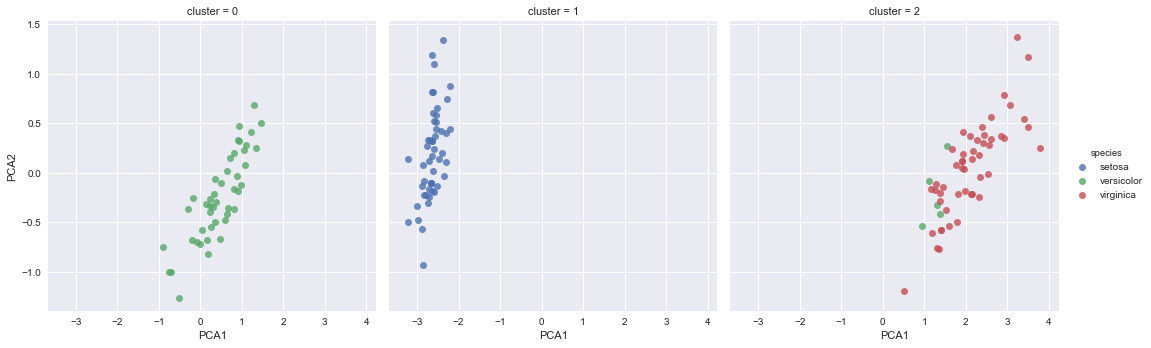

In [42]:
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 0, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

### In conclusion
We have presented 3 methods for predicting the type of flower:

Supervised learning:
#1) A simple Gaussian naive Bayes model.

Un-supervised learning:
#2) Using PCA to reduce the 4 dimension feature matrix to 2 dimension - this showed us after plotting the 2D plane            (was created without knowing the labels!) that species are fairly well separated. 
#3) Using GMM - the clustering algorithm found well enough to separate the flower species automatically  
